In [1]:
from Graph_visualization import * 

## Graphes - Partie A 

In [2]:
A,labelsA=interaction_matrix_global('Data/datasetA.json')

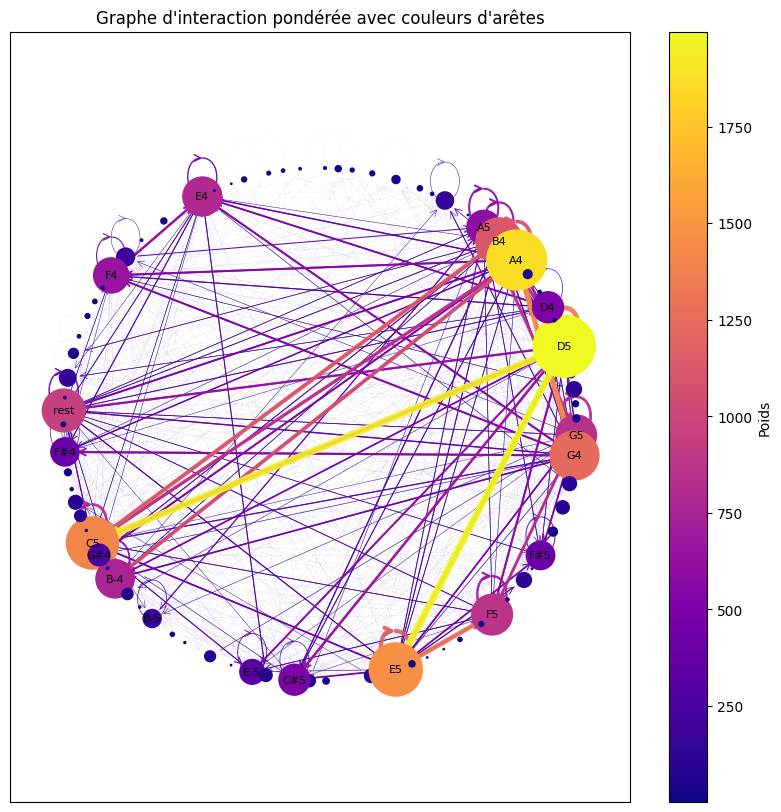

In [3]:
graphe_ameliore_global(A, labelsA)

In [4]:
A,labelsA= interaction_matrix_simplifie('Data/datasetA.json')

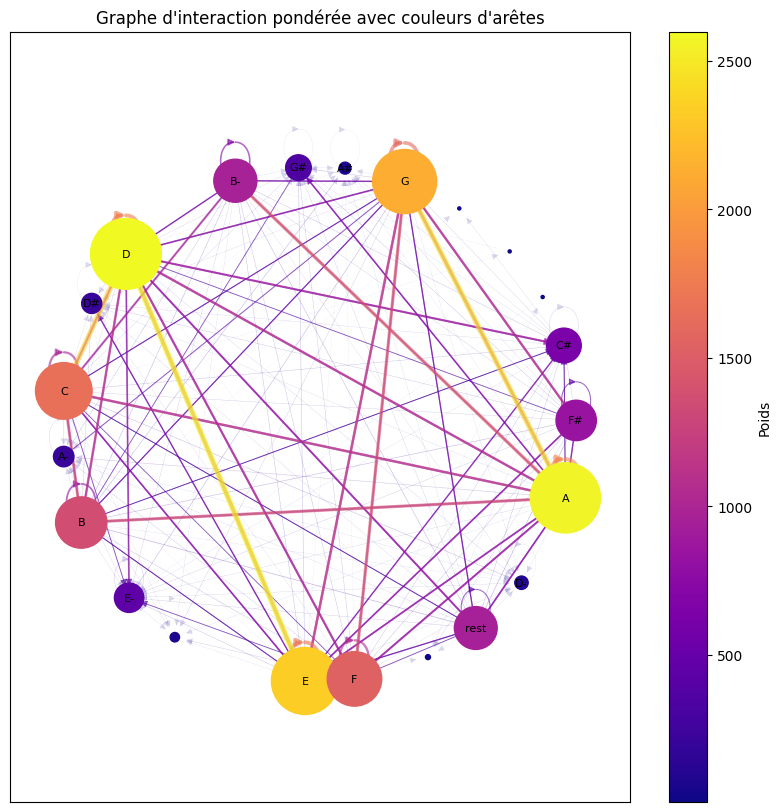

In [5]:
graphe_ameliore_simplifie(A, labelsA)

## Graphes - Partie B

In [11]:
B, labelsB = interaction_matrix_global('Data/datasetB.json')

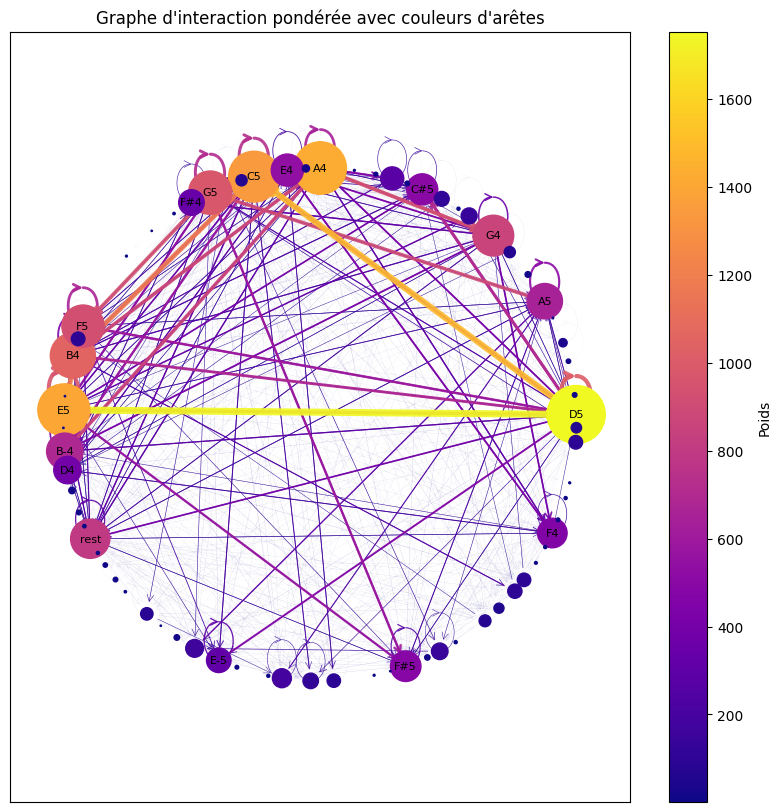

In [15]:
graphe_ameliore_global(B, labelsB)

In [6]:
B, labelsB = interaction_matrix_simplifie('Data/datasetB.json')

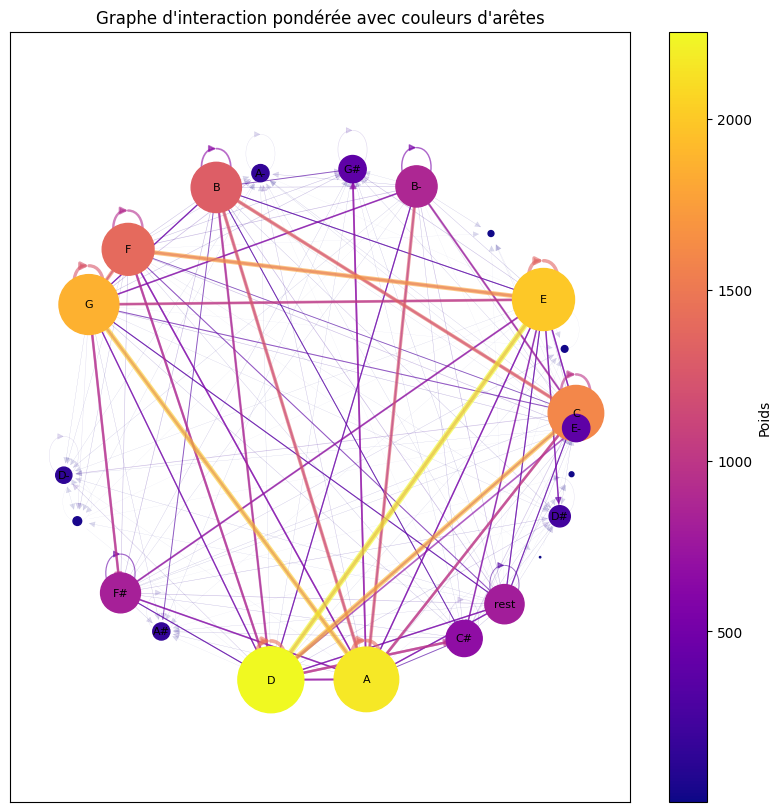

In [7]:
graphe_ameliore_simplifie(B, labelsB)

## Graphes - Partie C 

In [16]:
C, labelsC = interaction_matrix_global('Data/datasetC.json')

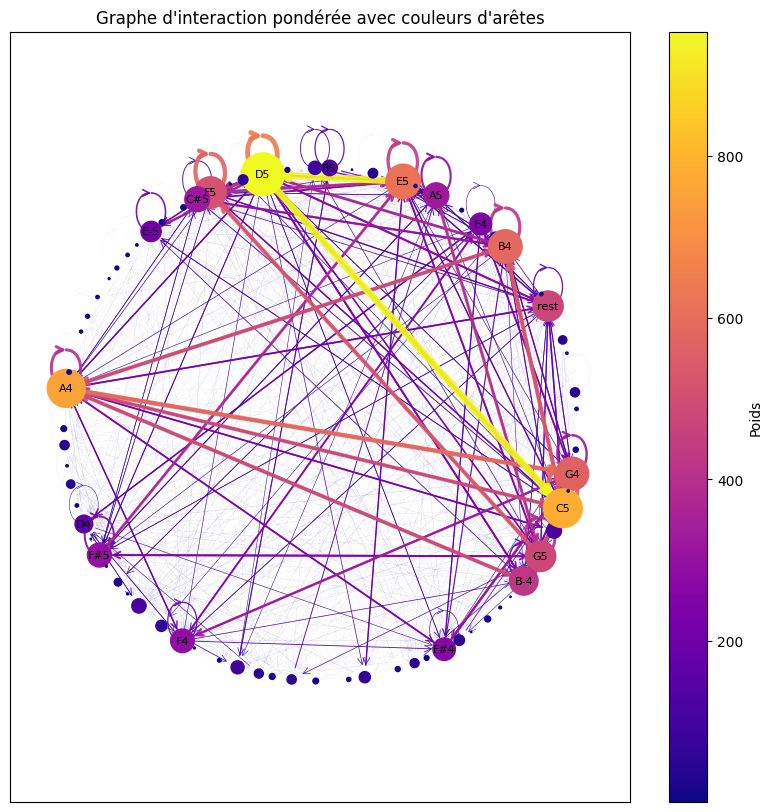

In [20]:
graphe_ameliore_global(C, labelsC)

In [8]:
C, labelsC = interaction_matrix_simplifie('Data/datasetC.json')

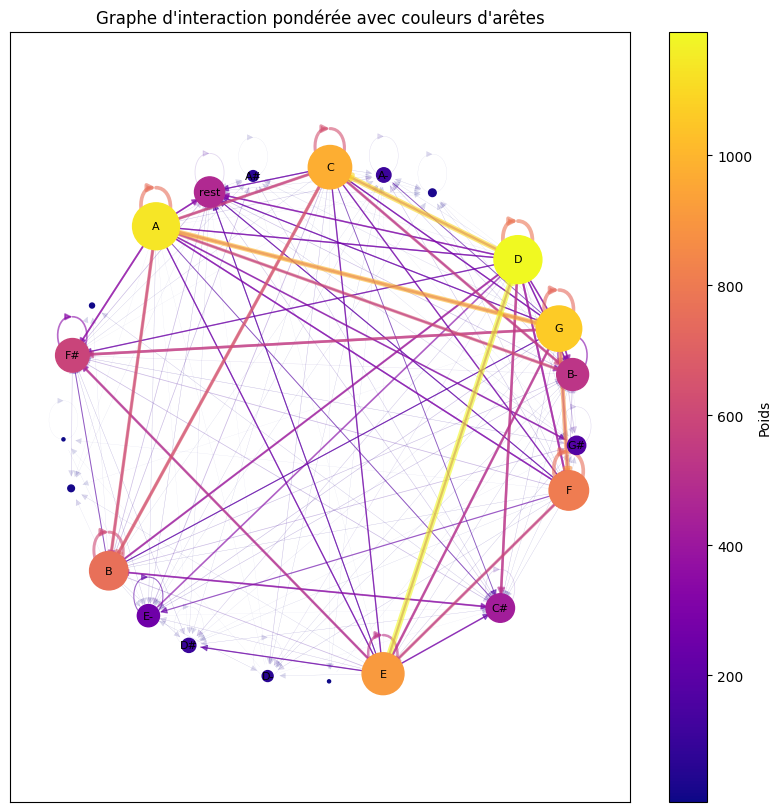

In [10]:
graphe_ameliore_simplifie(C, labelsC)

## Graphes à garder pour des vérifications 

In [3]:
A,labels=interaction_matrix_global('Data/datasetA.json')

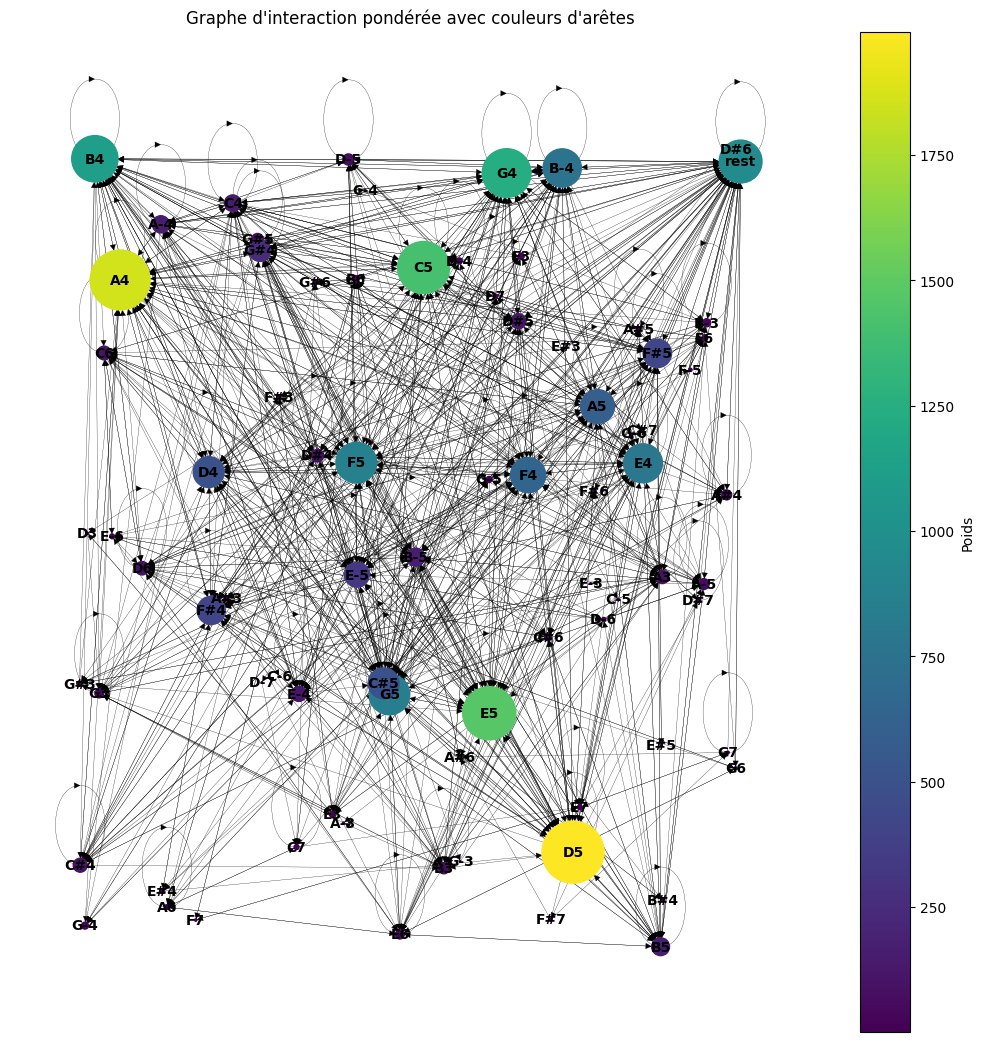

In [4]:
graphe_brut(A, labels)

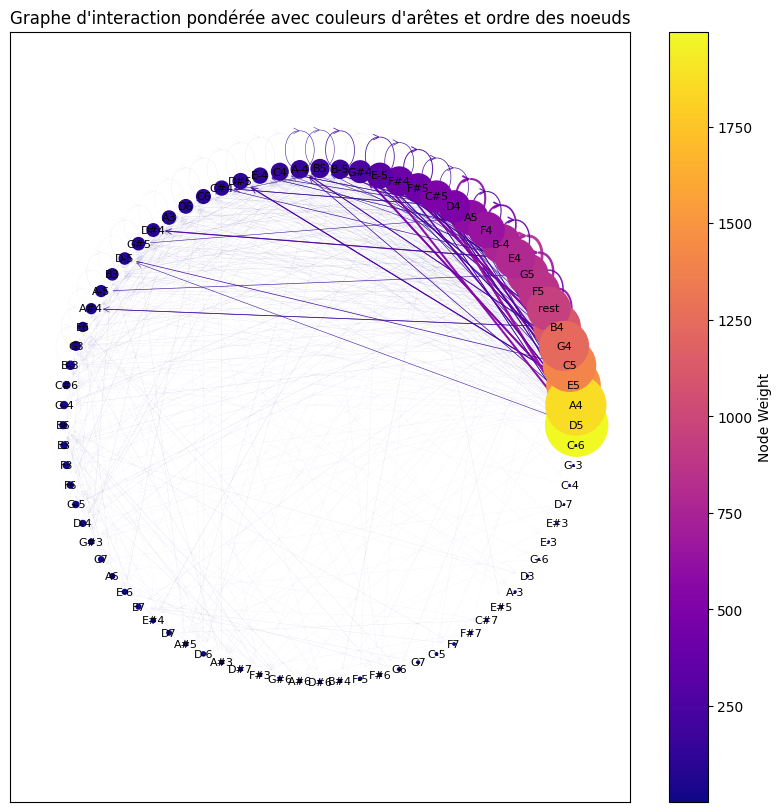

In [5]:
graphe_croissant(A,labels)

## Graphes - Parties D 
Non utilisé pour l'analyse en vu de la faible proportion de partitions avec des parties D. 

In [21]:
def create_graph_visualization_partD(A, label_id):
    # Créer un graphe dirigé à partir de la matrice d'interaction
    G = nx.DiGraph()
    G.add_nodes_from(label_id)
    num_nodes = len(label_id)
    plt.figure(figsize=(10, 10))  

    # Ajout des arêtes pondérées au graphe 
    for i in label_id:
        for j in label_id:
            weight = A[label_id[i], label_id[j]]
            if weight > 0:
                G.add_edge(i, j, weight=weight)

    # Calcul de la taille des noeuds en fonction du poids total des arêtes entrantes
    node_weights = {node: np.sum(A[:, label_id[node]]) for node in G.nodes()}
    node_sizes = [node_weights[node] for node in G.nodes()]

    # Determine le seuil d'affichage des etiquettes (exemple : 75e percentile ici)
    label_display_threshold = np.percentile(node_sizes, 1)

    # Attribuer aux noeuds des positions aléatoires dans un cercle
    # Et trier les noeuds par poids
    sorted_nodes_by_weight = sorted(G.nodes(data=True), key=lambda x: node_weights[x[0]], reverse=True)

    # Placer le plus gros noeud de maniere aléatoire, et placer les autres noeuds en verifiant les distances, pour éviter les chevauchements des noeuds interessants à afficher
    pos = {}
    angles_used = set()
    for node, data in sorted_nodes_by_weight:
        while True:
            angle = random.uniform(0, 2 * np.pi)
            if all(not np.isclose(angle, used_angle, atol=0.05) for used_angle in angles_used):  # atol dépend de la répartition que l'on souhaite 
                angles_used.add(angle)
                pos[node] = (np.cos(angle), np.sin(angle))
                break

    
    # Dessiner le ghraphe, en utilisant les positions 
    max_weight = max(node_weights.values())
    node_size_factor = 3
    # Ajuster la taille des nœuds en fonction de leurs poids
    node_sizes = [(node_weight / max_weight * 300 + 50) * node_size_factor for node_weight in node_weights.values()]

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, cmap=plt.cm.plasma)

    # N'afficher les étiquettes que des noeuds selectionnés avec le seuil
    labels_to_draw = {node: node for node, size in zip(G.nodes(), node_sizes) if size >= label_display_threshold}
    nx.draw_networkx_labels(G, pos, labels=labels_to_draw, font_size=8)
    
    weights = [data['weight'] for source, target, data in G.edges(data=True)]

    # Trier les arêtes par poids, pour que les arêtes de poids plus élevés soient dessinées en dernier (au dessus des autres)
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    

    # Avec différentes couleurs et transparence d'arêtes
    for (source, target, data) in sorted_edges:
        weight = data['weight']
        color = plt.cm.plasma(weight / max(weights))
        width = (weight / max(weights) * 5) + 0.1
        alpha = 0.1 if weight < np.mean(weights) else 0.9  # régler la transparence en fonction du poids
        nx.draw_networkx_edges(G, pos, edgelist=[(source, target)], width=width,
                               alpha=alpha, edge_color=[color], arrowstyle='->', arrowsize=13)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(node_sizes), vmax=max(node_sizes)))
    sm.set_array([])    
    plt.title("Graphe d'interaction pondérée avec couleurs d'arêtes")
    plt.colorbar(sm, label='Poids')
    plt.axis('equal')  
    plt.show()


In [22]:
D, labelsD = interaction_matrix_global('Data/datasetD.json')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12016\4082267062.py:68: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Poids')


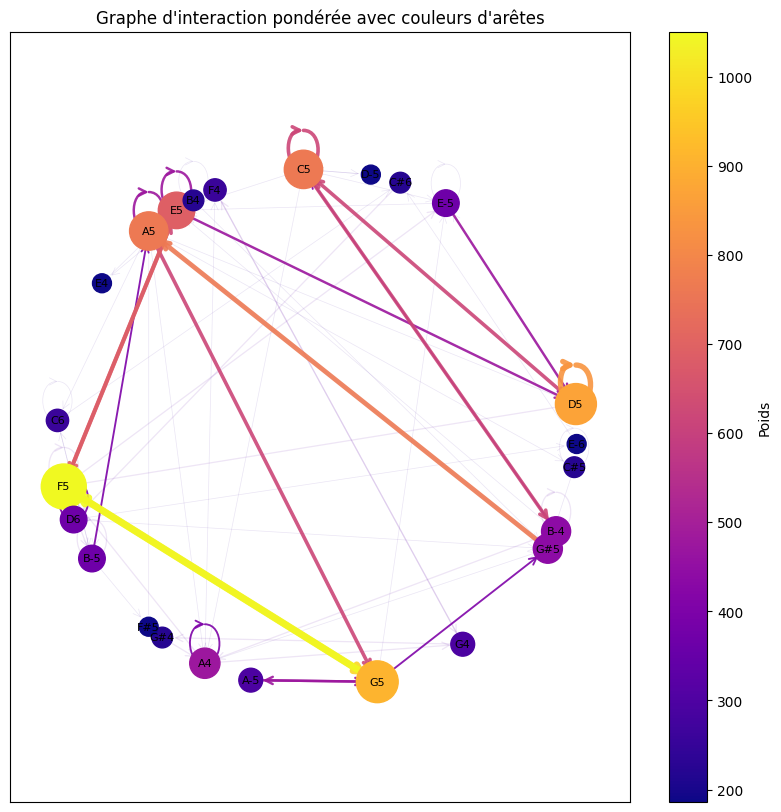

In [24]:
create_graph_visualization_partD(D, labelsD)